## Study dice randomness
Generate some 1000s signatures and study their randomness

In [2]:
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
import gnupg
from co2mpas.sampling import tstamp

G=gnupg.GPG()
rcv = tstamp.TstampReceiver()

In [58]:
import random

def gen_sig_num():
    s = G.sign(str(random.random()), keyid='cbbb52ff')
    v = G.verify(s.data)
    return tstamp.pgp_sig_to_sig_id_num(v.signature_id)

do_generate = True
fname = 'signums.txt'
nmus = []
try:
    with open(fname, 'rt') as fd:
        nums = [int(line) for line in fd]
except FileNotFoundError:
    pass

if do_generate or not nums:
    n = 5_000
    with open(fname, 'at') as fd:
        for i in range(n):
            num = gen_sig_num()
            nums.append(num)
            fd.write('%s\n' % num)

In [59]:
old_dices = np.array([tstamp.num_to_dice100(num, None)[1] for num in nums])
new_dices = np.array([tstamp.num_to_dice100(num, True)[1] for num in nums])

old_freqs = Counter(old_dices)
new_freqs = Counter(new_dices)

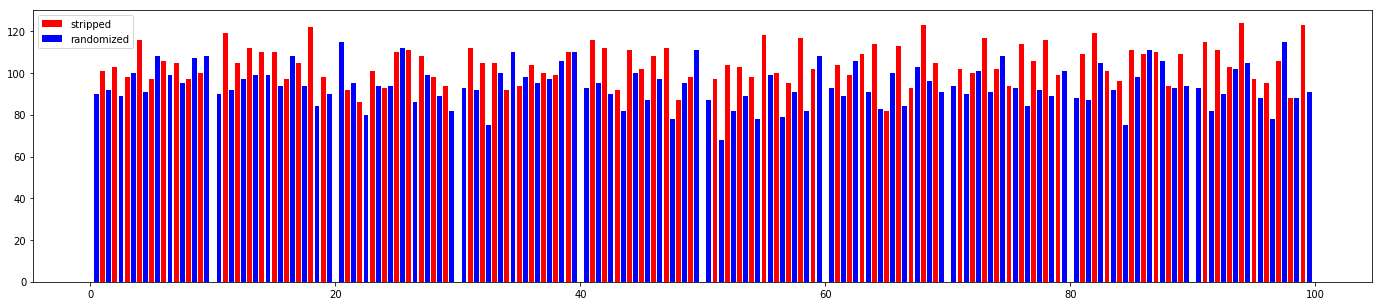

In [109]:
index = np.arange(100.0)

old_afreqs = pd.Series(old_freqs).reindex(index)
new_afreqs = pd.Series(new_freqs).reindex(index)

width = 0.40
sep = 0.10
plt.subplots(figsize=(24,5))
plt.bar(old_afreqs.index, old_afreqs.values, color='r', width=width, label='stripped');
plt.bar(new_afreqs.index + width + sep, new_afreqs.values, color='b', width=width, label='randomized');
plt.legend();

In [61]:
def sample_ratio(afreqs, limit=90):
    return afreqs[limit:].sum() / afreqs.sum()

old_ratio = sample_ratio(old_afreqs)
new_ratio = sample_ratio(new_afreqs)
print(old_ratio, new_ratio)

0.10235131396957123 0.09915948505160123


## Progression of the ratio as sigs accumulate

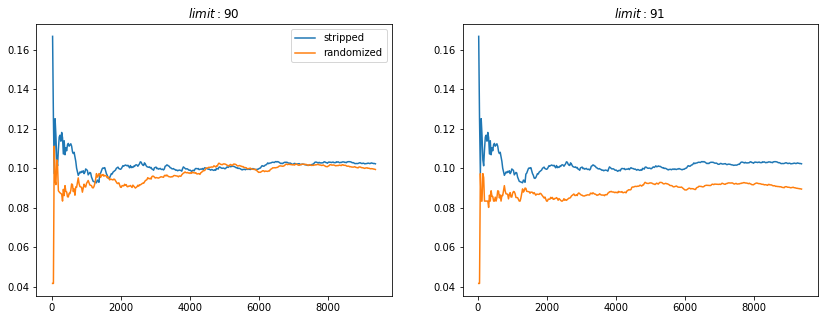

In [110]:
limit=90

def sample_ratio2(dices):
    return (dices >= limit).sum() / dices.size

def progressive_sample_ratio(dices, stop_points=380):
    step = int(len(dices) / stop_points)
    x = np.arange(step, len(dices), step)
    y = np.fromiter((sample_ratio2(dices[:i]) for i in x), float)
    
    return x, y

fig, axs = plt.subplots(ncols=2, figsize=(14, 5))
ax=axs[0]
ax.plot(*progressive_sample_ratio(old_dices), label='stripped');
ax.plot(*progressive_sample_ratio(new_dices), label='randomized');
ax.legend()
ax.set_title('$limit: 90$')

limit=91
ax=axs[1]
ax.plot(*progressive_sample_ratio(old_dices));
ax.plot(*progressive_sample_ratio(new_dices));
ax.set_title('$limit: 91$');